In [4]:
%load_ext autoreload
%autoreload 2
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from google.colab import files

import sys
sys.path.append("/content/drive/MyDrive/ML_Stock")

from Model import Model
from Stock import Stock



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 16.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
name = "COKE"
data = yf.download(tickers = name,period = '350d')


[*********************100%***********************]  1 of 1 completed


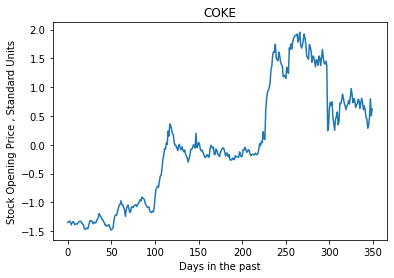

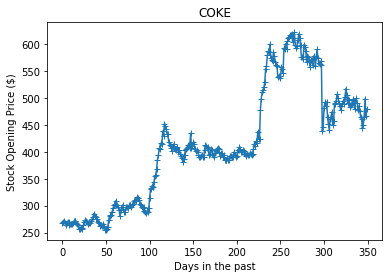

In [16]:
#plt.plot(data['Open'])

arr = np.array(data['Open'])
X = (arr - arr.mean())/arr.std()
plt.title(name)
plt.xlabel("Days in the past") #re-write this to be dates
plt.ylabel("Stock Opening Price , Standard Units")
plt.plot(X)
plt.show()

arr = np.array(data['Open'])
X = (arr - arr.mean())/arr.std()
plt.title(name)
plt.xlabel("Days in the past") #re-write this to be dates
plt.ylabel("Stock Opening Price ($)")
plt.plot(arr,"-+")

In [25]:
# NOTE: the input prices are in a very naive form now. Simply the oppening prices per day.
# Current inputs are purely for testing of class.
stck = Stock(arr,1,epochs = 1000, stockname = "COKE",theta = [1024,1024],lookback_interval = 100,lookbacks = 2)
stck.run()


Model 1 of 2 trained
Model 2 of 2 trained


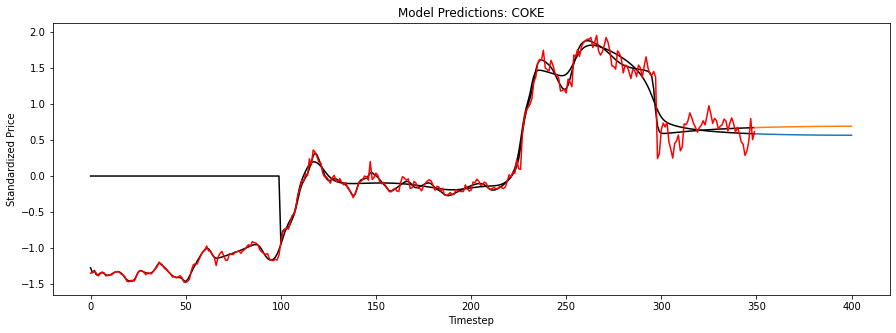

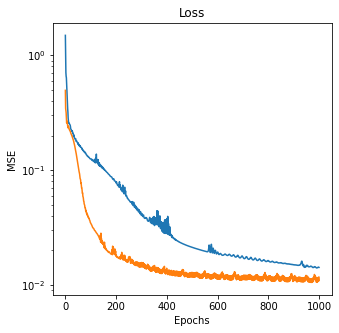

In [26]:
stck.plot_predictions(in_figsize = (15,5))
stck.plot_losses()